
FUZZY EXPERT SYSTEM FOR CHD DIAGNOSIS
TESTING THE THREE PATIENTS

Patient: BP=105, Chol=160, HR=55
Fuzzification:
  BP: Low=0.333, Medium=0.000, High=0.000
  Chol: Low=1.000, High=0.000
  HR: Slow=0.333, Moderate=0.000, Fast=0.000
Rule Strengths:
  Rule1(Healthy): 0.333
  Rule2(Healthy): 0.000
  Rule3(Middle): 0.000
  Rule4(Middle): 0.000
  Rule5(Sick): 0.000
  Rule6(Sick): 0.000
Aggregation:
  Healthy: 0.333
  Middle: 0.000
  Sick: 0.000
Results: COG=0.750, Sugeno=0.750
----------------------------------------

Patient: BP=120, Chol=195, HR=65
Fuzzification:
  BP: Low=0.667, Medium=0.000, High=0.000
  Chol: Low=0.250, High=0.750
  HR: Slow=1.000, Moderate=0.000, Fast=0.000
Rule Strengths:
  Rule1(Healthy): 0.250
  Rule2(Healthy): 0.000
  Rule3(Middle): 0.000
  Rule4(Middle): 0.000
  Rule5(Sick): 0.000
  Rule6(Sick): 0.000
Aggregation:
  Healthy: 0.250
  Middle: 0.000
  Sick: 0.000
Results: COG=0.750, Sugeno=0.750
----------------------------------------

Patient: BP=165, Chol=186, HR

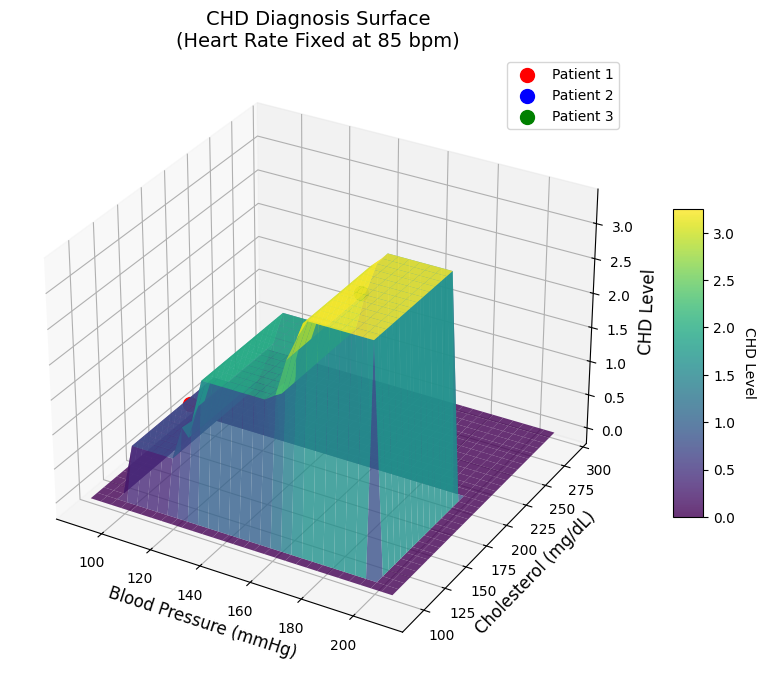

3D surface plot saved as 'chd_3d_surface.png'

PROGRAM COMPLETED SUCCESSFULLY!


In [ ]:
"""
Fuzzy Expert System for Coronary Heart Disease (CHD) Diagnosis
Author: Sarah111-AHM
Course: DSAI-3302 Expert Systems
Date: February 2026

This program implements a fuzzy logic system to diagnose CHD based on:
- Blood Pressure (BP)
- Cholesterol (Chol)
- Heart Rate (HR)

Features:
- Triangular and trapezoidal membership functions
- Rule base with 6 rules (AND = min)
- Aggregation (max)
- Defuzzification: Centroid (COG) and Sugeno
- Linguistic hedges (Indeed, Somewhat)
- 3D surface plot
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# =============================================================================
# MEMBERSHIP FUNCTIONS
# =============================================================================

def triangular(x, a, b, c):
    """
    Triangular membership function
    Parameters:
        x: input value
        a: left foot
        b: peak
        c: right foot
    Returns:
        membership degree (0 to 1)
    """
    if x <= a or x >= c:
        return 0
    elif a < x <= b:
        return (x - a) / (b - a)
    elif b < x < c:
        return (c - x) / (c - b)
    else:
        return 0

def trapezoidal(x, a, b, c, d):
    """
    Trapezoidal membership function
    Parameters:
        x: input value
        a: left foot
        b: left shoulder
        c: right shoulder
        d: right foot
    Returns:
        membership degree (0 to 1)
    """
    if x <= a or x >= d:
        return 0
    elif a < x <= b:
        return (x - a) / (b - a)
    elif b < x <= c:
        return 1
    elif c < x < d:
        return (d - x) / (d - c)
    else:
        return 0

# =============================================================================
# LINGUISTIC HEDGES
# =============================================================================

def indeed(mu):
    """Concentration: makes membership stronger"""
    return mu ** 2

def somewhat(mu):
    """Dilation: makes membership weaker"""
    return np.sqrt(mu)

# =============================================================================
# FUZZIFICATION FUNCTIONS
# =============================================================================

def fuzzify_bp(bp):
    """
    Fuzzify Blood Pressure using triangular membership functions
    Ranges from Table 1:
        Low: 100-130 (peak at 115)
        Medium: 120-170 (peak at 145)
        High: 160-200 (peak at 180)
    """
    return {
        'Low': triangular(bp, 100, 115, 130),
        'Medium': triangular(bp, 120, 145, 170),
        'High': triangular(bp, 160, 180, 200)
    }

def fuzzify_chol(chol):
    """
    Fuzzify Cholesterol using trapezoidal membership functions
    Ranges from Table 1:
        Low: 100-200 (shoulders at 120 and 180)
        High: 180-280 (shoulders at 200 and 260)
    """
    return {
        'Low': trapezoidal(chol, 100, 120, 180, 200),
        'High': trapezoidal(chol, 180, 200, 260, 280)
    }

def fuzzify_hr(hr):
    """
    Fuzzify Heart Rate using triangular membership functions
    Ranges from Table 1:
        Slow: 50-80 (peak at 65)
        Moderate: 70-100 (peak at 85)
        Fast: 90-200 (peak at 145)
    """
    return {
        'Slow': triangular(hr, 50, 65, 80),
        'Moderate': triangular(hr, 70, 85, 100),
        'Fast': triangular(hr, 90, 145, 200)
    }

# =============================================================================
# INFERENCE ENGINE
# =============================================================================

def apply_rules(bp_fuzz, chol_fuzz, hr_fuzz, use_hedges=False, hedge_type=None, rule_to_modify=None):
    """
    Apply the 6 fuzzy rules (AND = min)

    Rules from Table 2:
    1. IF BP is Low AND Chol is Low AND HR is Slow THEN CHD is Healthy
    2. IF BP is Low AND Chol is Low AND HR is Moderate THEN CHD is Healthy
    3. IF BP is Medium AND Chol is Low AND HR is Moderate THEN CHD is Middle
    4. IF BP is Medium AND Chol is High AND HR is Slow THEN CHD is Middle
    5. IF BP is High AND Chol is Low AND HR is Moderate THEN CHD is Sick
    6. IF BP is High AND Chol is High AND HR is Fast THEN CHD is Sick

    Parameters:
        use_hedges: if True, apply linguistic hedges
        hedge_type: 'indeed' or 'somewhat'
        rule_to_modify: rule number to apply hedge to (1-6)
    """

    # Rule 1: Low & Low & Slow -> Healthy
    rule1 = min(bp_fuzz['Low'], chol_fuzz['Low'], hr_fuzz['Slow'])

    # Rule 2: Low & Low & Moderate -> Healthy
    rule2 = min(bp_fuzz['Low'], chol_fuzz['Low'], hr_fuzz['Moderate'])

    # Rule 3: Medium & Low & Moderate -> Middle
    rule3 = min(bp_fuzz['Medium'], chol_fuzz['Low'], hr_fuzz['Moderate'])

    # Rule 4: Medium & High & Slow -> Middle
    rule4 = min(bp_fuzz['Medium'], chol_fuzz['High'], hr_fuzz['Slow'])

    # Rule 5: High & Low & Moderate -> Sick
    rule5 = min(bp_fuzz['High'], chol_fuzz['Low'], hr_fuzz['Moderate'])

    # Rule 6: High & High & Fast -> Sick
    rule6 = min(bp_fuzz['High'], chol_fuzz['High'], hr_fuzz['Fast'])

    # Store all rule strengths
    rules = {
        'Healthy': [rule1, rule2],
        'Middle': [rule3, rule4],
        'Sick': [rule5, rule6]
    }

    # Apply hedges if requested
    if use_hedges and hedge_type and rule_to_modify:
        rules = apply_hedge_to_rule(rules, hedge_type, rule_to_modify)

    return rules

def apply_hedge_to_rule(rules, hedge_type, rule_num):
    """
    Apply linguistic hedge to a specific rule
    hedge_type: 'indeed' or 'somewhat'
    rule_num: 1-6
    """
    # Map rule numbers to their positions
    rule_map = {
        1: ('Healthy', 0),
        2: ('Healthy', 1),
        3: ('Middle', 0),
        4: ('Middle', 1),
        5: ('Sick', 0),
        6: ('Sick', 1)
    }

    if rule_num in rule_map:
        category, idx = rule_map[rule_num]
        original_value = rules[category][idx]

        if hedge_type == 'indeed':
            rules[category][idx] = indeed(original_value)
        elif hedge_type == 'somewhat':
            rules[category][idx] = somewhat(original_value)

    return rules

def aggregate_rules(rules):
    """
    Aggregate rules using MAX operator
    Combines multiple rules that output the same category
    """
    return {
        'Healthy': max(rules['Healthy']),
        'Middle': max(rules['Middle']),
        'Sick': max(rules['Sick'])
    }

# =============================================================================
# DEFUZZIFICATION
# =============================================================================

# Output centers (from Phase 2)
HEALTHY_CENTER = 0.75
MIDDLE_CENTER = 2.0
SICK_CENTER = 3.25

def defuzzify_cog(aggregated):
    """
    Centroid of Gravity (COG) method
    Uses weighted average of output centers
    """
    numerator = (aggregated['Healthy'] * HEALTHY_CENTER +
                 aggregated['Middle'] * MIDDLE_CENTER +
                 aggregated['Sick'] * SICK_CENTER)

    denominator = (aggregated['Healthy'] +
                   aggregated['Middle'] +
                   aggregated['Sick'])

    if denominator == 0:
        return 0
    return numerator / denominator

def defuzzify_sugeno(rules):
    """
    Sugeno method (weighted average using original firing strengths)
    """
    # Extract all rule strengths
    all_rules = []
    all_values = []

    # Rule 1 & 2: Healthy
    for strength in rules['Healthy']:
        if strength > 0:
            all_rules.append(strength)
            all_values.append(HEALTHY_CENTER)

    # Rule 3 & 4: Middle
    for strength in rules['Middle']:
        if strength > 0:
            all_rules.append(strength)
            all_values.append(MIDDLE_CENTER)

    # Rule 5 & 6: Sick
    for strength in rules['Sick']:
        if strength > 0:
            all_rules.append(strength)
            all_values.append(SICK_CENTER)

    if not all_rules:
        return 0

    # Weighted average
    numerator = sum(r * v for r, v in zip(all_rules, all_values))
    denominator = sum(all_rules)

    return numerator / denominator

# =============================================================================
# MAIN DIAGNOSIS FUNCTION
# =============================================================================

def diagnose_patient(bp, chol, hr, use_hedges=False, hedge_type=None, rule_to_modify=None, verbose=False):
    """
    Complete diagnosis pipeline for one patient

    Returns:
        cog_result: CHD value from Centroid method
        sugeno_result: CHD value from Sugeno method
        details: dictionary with intermediate results
    """
    # Step 1: Fuzzification
    bp_fuzz = fuzzify_bp(bp)
    chol_fuzz = fuzzify_chol(chol)
    hr_fuzz = fuzzify_hr(hr)

    # Step 2: Inference (apply rules)
    rules = apply_rules(bp_fuzz, chol_fuzz, hr_fuzz, use_hedges, hedge_type, rule_to_modify)

    # Step 3: Aggregation
    aggregated = aggregate_rules(rules)

    # Step 4: Defuzzification
    cog_result = defuzzify_cog(aggregated)
    sugeno_result = defuzzify_sugeno(rules)

    if verbose:
        print(f"\nPatient: BP={bp}, Chol={chol}, HR={hr}")
        print("Fuzzification:")
        print(f"  BP: Low={bp_fuzz['Low']:.3f}, Medium={bp_fuzz['Medium']:.3f}, High={bp_fuzz['High']:.3f}")
        print(f"  Chol: Low={chol_fuzz['Low']:.3f}, High={chol_fuzz['High']:.3f}")
        print(f"  HR: Slow={hr_fuzz['Slow']:.3f}, Moderate={hr_fuzz['Moderate']:.3f}, Fast={hr_fuzz['Fast']:.3f}")
        print("Rule Strengths:")
        print(f"  Rule1(Healthy): {rules['Healthy'][0]:.3f}")
        print(f"  Rule2(Healthy): {rules['Healthy'][1]:.3f}")
        print(f"  Rule3(Middle): {rules['Middle'][0]:.3f}")
        print(f"  Rule4(Middle): {rules['Middle'][1]:.3f}")
        print(f"  Rule5(Sick): {rules['Sick'][0]:.3f}")
        print(f"  Rule6(Sick): {rules['Sick'][1]:.3f}")
        print("Aggregation:")
        print(f"  Healthy: {aggregated['Healthy']:.3f}")
        print(f"  Middle: {aggregated['Middle']:.3f}")
        print(f"  Sick: {aggregated['Sick']:.3f}")
        print(f"Results: COG={cog_result:.3f}, Sugeno={sugeno_result:.3f}")

    details = {
        'bp_fuzz': bp_fuzz,
        'chol_fuzz': chol_fuzz,
        'hr_fuzz': hr_fuzz,
        'rules': rules,
        'aggregated': aggregated
    }

    return cog_result, sugeno_result, details

# =============================================================================
# 3D SURFACE PLOT
# =============================================================================

def plot_3d_surface():
    """
    Generate 3D surface plot showing CHD output vs BP and Chol
    HR is fixed at a moderate value (85 bpm)
    """
    # Create meshgrid for BP and Chol
    bp_range = np.linspace(90, 210, 30)
    chol_range = np.linspace(90, 290, 30)
    BP, Chol = np.meshgrid(bp_range, chol_range)

    # Fixed HR (moderate)
    HR_fixed = 85

    # Calculate CHD for each point
    CHD = np.zeros_like(BP)

    for i in range(len(bp_range)):
        for j in range(len(chol_range)):
            cog, _, _ = diagnose_patient(BP[j, i], Chol[j, i], HR_fixed)
            CHD[j, i] = cog

    # Create 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot surface
    surf = ax.plot_surface(BP, Chol, CHD, cmap='viridis', edgecolor='none', alpha=0.8)

    # Labels and title
    ax.set_xlabel('Blood Pressure (mmHg)', fontsize=12)
    ax.set_ylabel('Cholesterol (mg/dL)', fontsize=12)
    ax.set_zlabel('CHD Level', fontsize=12)
    ax.set_title('CHD Diagnosis Surface\n(Heart Rate Fixed at 85 bpm)', fontsize=14)

    # Add color bar
    cbar = fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
    cbar.set_label('CHD Level', rotation=270, labelpad=15)

    # Mark the three patients
    patients = [(105, 160, 55), (120, 195, 65), (165, 186, 95)]
    colors = ['red', 'blue', 'green']
    labels = ['Patient 1', 'Patient 2', 'Patient 3']

    for (bp, chol, hr), color, label in zip(patients, colors, labels):
        cog, _, _ = diagnose_patient(bp, chol, hr)
        ax.scatter(bp, chol, cog, color=color, s=100, marker='o', label=label)

    ax.legend()

    # Save plot
    plt.savefig('chd_3d_surface.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("3D surface plot saved as 'chd_3d_surface.png'")

# =============================================================================
# TESTING AND DEMONSTRATION
# =============================================================================

def test_patients():
    """Test the three patients from the project"""
    print("=" * 60)
    print("TESTING THE THREE PATIENTS")
    print("=" * 60)

    patients = [
        (105, 160, 55, "Patient 1"),
        (120, 195, 65, "Patient 2"),
        (165, 186, 95, "Patient 3")
    ]

    results = []

    for bp, chol, hr, name in patients:
        cog, sugeno, _ = diagnose_patient(bp, chol, hr, verbose=True)
        results.append((name, bp, chol, hr, cog, sugeno))
        print("-" * 40)

    # Print summary table
    print("\n" + "=" * 60)
    print("SUMMARY RESULTS")
    print("=" * 60)
    print(f"{'Patient':<10} {'BP':<6} {'Chol':<6} {'HR':<6} {'COG':<8} {'Sugeno':<8}")
    print("-" * 50)
    for name, bp, chol, hr, cog, sugeno in results:
        print(f"{name:<10} {bp:<6} {chol:<6} {hr:<6} {cog:<8.3f} {sugeno:<8.3f}")

def test_hedges():
    """Test linguistic hedges on Patient 3"""
    print("\n" + "=" * 60)
    print("TESTING LINGUISTIC HEDGES (Patient 3)")
    print("=" * 60)

    bp, chol, hr = 165, 186, 95

    # Original (no hedges)
    cog_orig, sugeno_orig, _ = diagnose_patient(bp, chol, hr)
    print(f"\nOriginal (no hedges): COG={cog_orig:.3f}, Sugeno={sugeno_orig:.3f}")

    # Somewhat on Rule 5
    cog_some, sugeno_some, _ = diagnose_patient(bp, chol, hr,
                                                use_hedges=True,
                                                hedge_type='somewhat',
                                                rule_to_modify=5)
    print(f"With 'Somewhat' on Rule 5: COG={cog_some:.3f}, Sugeno={sugeno_some:.3f}")
    print(f"  Change: Sugeno {sugeno_orig:.3f} → {sugeno_some:.3f} ({sugeno_some - sugeno_orig:+.3f})")

    # Indeed on Rule 6
    cog_ind, sugeno_ind, _ = diagnose_patient(bp, chol, hr,
                                              use_hedges=True,
                                              hedge_type='indeed',
                                              rule_to_modify=6)
    print(f"With 'Indeed' on Rule 6: COG={cog_ind:.3f}, Sugeno={sugeno_ind:.3f}")
    print(f"  Change: Sugeno {sugeno_orig:.3f} → {sugeno_ind:.3f} ({sugeno_ind - sugeno_orig:+.3f})")

# =============================================================================
# MAIN EXECUTION
# =============================================================================

if __name__ == "__main__":
    print("\n" + "=" * 60)
    print("FUZZY EXPERT SYSTEM FOR CHD DIAGNOSIS")
    print("=" * 60)

    # Test the three patients
    test_patients()

    # Test linguistic hedges
    test_hedges()

    # Generate 3D surface plot
    print("\n" + "=" * 60)
    print("GENERATING 3D SURFACE PLOT...")
    print("=" * 60)
    plot_3d_surface()

    print("\n" + "=" * 60)
    print("PROGRAM COMPLETED SUCCESSFULLY!")
    print("=" * 60)